In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.utils import check_metric

In [2]:
df = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,-0.294417,51105.607208,49112.465792,4.687850e+04,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,1.146316,73647.549162,71186.768604,6.931527e+04,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3479.750000,2907.750000,2.594250e+03,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22217.000000,21107.000000,2.000950e+04,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66996.750000,63997.250000,6.022025e+04,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:>

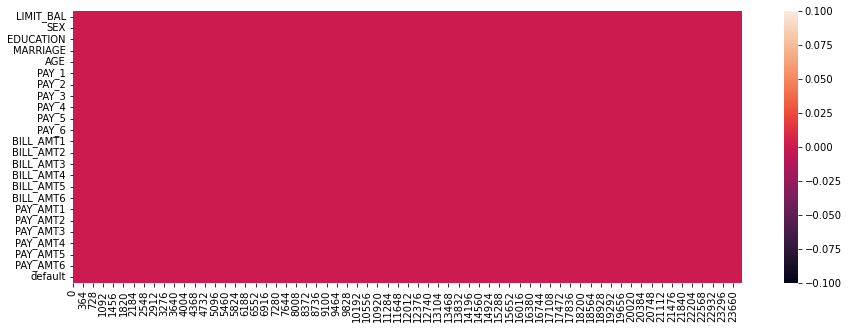

In [4]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isna().transpose())

In [5]:
df_train = df.sample(frac=0.7) # splitting train and test data

In [6]:
df_test = df.drop(df_train.index)

In [7]:
print(f"Shape of training data:{df_train.shape}")
print(f"Shape of testing data:{df_test.shape}")

Shape of training data:(16800, 24)
Shape of testing data:(7200, 24)


In [8]:
df_train.reset_index(inplace=True, drop=True)

In [9]:
df_test.reset_index(inplace=True, drop=True)


In [10]:
df_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
1,100000,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
2,140000,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
3,200000,2,3,2,34,0,0,2,0,0,-1,11073.0,9787.0,5535.0,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0,0
4,260000,2,1,2,51,-1,-1,-1,-1,-1,2,12261.0,21670.0,9966.0,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0


In [11]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,180000,2,3,2,39,1,-1,0,-1,0,0,0.0,4835.0,2220.0,11303.0,9359.0,9041.0,4835.0,2200.0,11303.0,187.0,181.0,3050.0,0
1,100000,1,0,2,37,0,0,-2,-2,-2,-2,7642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,30000,2,3,3,48,0,0,2,0,0,0,18385.0,20422.0,18905.0,24817.0,29220.0,17260.0,4000.0,0.0,10000.0,5000.0,1700.0,0.0,0
3,50000,2,1,2,49,2,2,4,4,4,4,150.0,150.0,150.0,150.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,360000,1,2,2,29,0,0,0,0,0,0,268112.0,263368.0,259969.0,255832.0,245462.0,250244.0,9429.0,8738.0,7017.0,7154.0,7073.0,7300.0,0


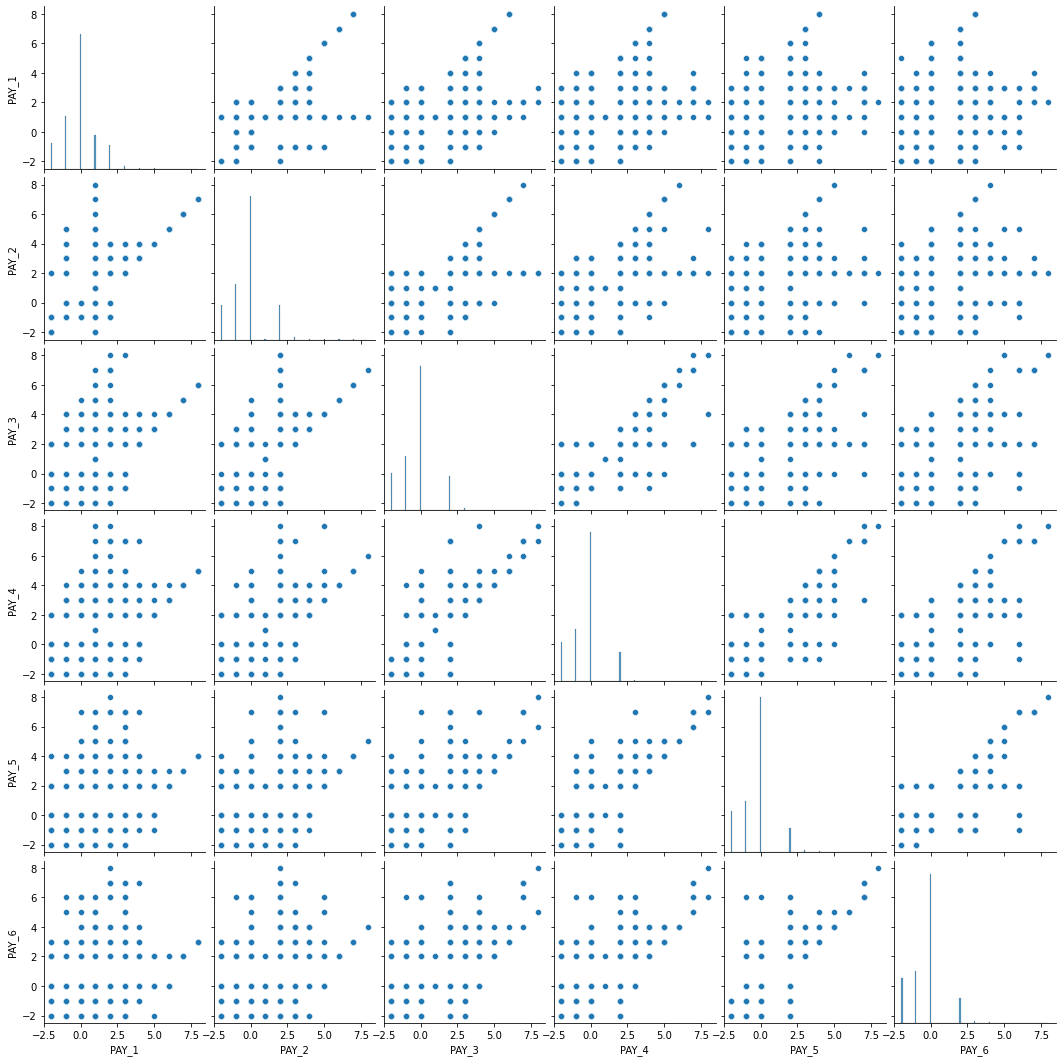

In [45]:
sns.pairplot(df_train[["PAY_1","PAY_2","PAY_3","PAY_4"	,"PAY_5","PAY_6"]])

In [85]:
clas0 = setup(data=df_train, target="default", session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(16800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [86]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8195,0.0000,0.3518,0.6800,0.4632,0.3678,0.3969,0.0440
lda,Linear Discriminant Analysis,0.8187,0.7626,0.3694,0.6641,0.4741,0.3754,0.3992,0.3130
gbc,Gradient Boosting Classifier,0.8182,0.7782,0.3533,0.6709,0.4624,0.3656,0.3930,3.6570
lightgbm,Light Gradient Boosting Machine,0.8165,0.7741,0.3613,0.6562,0.4655,0.3660,0.3899,0.3100
ada,Ada Boost Classifier,0.8146,0.7689,0.3238,0.6692,0.4359,0.3409,0.3733,0.9570
rf,Random Forest Classifier,0.8110,0.7614,0.3475,0.6342,0.4482,0.3460,0.3691,1.8460
et,Extra Trees Classifier,0.7991,0.7340,0.3533,0.5766,0.4377,0.3241,0.3387,1.7230
lr,Logistic Regression,0.7781,0.6433,0.0008,0.1000,0.0015,0.0005,0.0015,0.6780
knn,K Neighbors Classifier,0.7502,0.6039,0.1833,0.3719,0.2453,0.1160,0.1265,0.6560
svm,SVM - Linear Kernel,0.7281,0.0000,0.1135,0.1476,0.0908,0.0137,0.0201,0.2770


In [87]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [88]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8291,0.0000,0.3731,0.7185,0.4911,0.4005,0.4317
1,0.8163,0.0000,0.3808,0.6429,0.4783,0.3756,0.3945
2,0.8291,0.0000,0.3985,0.7027,0.5086,0.4145,0.4390
3,0.8274,0.0000,0.3525,0.7302,0.4755,0.3868,0.4237
4,0.8240,0.0000,0.3563,0.7045,0.4733,0.3810,0.4130
5,0.8155,0.0000,0.3257,0.6746,0.4393,0.3446,0.3773
6,0.8257,0.0000,0.3678,0.7059,0.4836,0.3910,0.4211
7,0.8061,0.0000,0.3103,0.6279,0.4154,0.3148,0.3429
8,0.8087,0.0000,0.3180,0.6385,0.4246,0.3249,0.3534
9,0.8136,0.0000,0.3346,0.6541,0.4427,0.3446,0.3725


In [91]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8308,0.0000,0.3769,0.7259,0.4962,0.4065,0.4381
1,0.8163,0.0000,0.3808,0.6429,0.4783,0.3756,0.3945
2,0.8282,0.0000,0.3985,0.6980,0.5073,0.4126,0.4364
3,0.8274,0.0000,0.3525,0.7302,0.4755,0.3868,0.4237
4,0.8240,0.0000,0.3563,0.7045,0.4733,0.3810,0.4130
5,0.8163,0.0000,0.3257,0.6800,0.4404,0.3465,0.3801
6,0.8257,0.0000,0.3716,0.7029,0.4862,0.3930,0.4220
7,0.8061,0.0000,0.3103,0.6279,0.4154,0.3148,0.3429
8,0.8095,0.0000,0.3180,0.6434,0.4256,0.3268,0.3560
9,0.8136,0.0000,0.3346,0.6541,0.4427,0.3446,0.3725


In [93]:
pred = predict_model(tuned_ridge, data=df_test)

In [99]:
pred

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label
0,250000,1,1,2,29,0,0,0,0,0,...,56875.0,55512.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,0,0
1,50000,2,3,3,23,1,2,0,0,0,...,29531.0,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0,0
2,20000,1,1,2,24,0,0,2,2,2,...,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1,0
3,70000,2,2,2,26,2,0,0,2,2,...,46905.0,46012.0,2007.0,3582.0,0.0,3601.0,0.0,1820.0,1,1
4,60000,1,1,2,27,1,-2,-1,-1,-1,...,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,50000,1,2,1,32,0,0,0,-1,2,...,40590.0,39384.0,2686.0,0.0,50551.0,0.0,1600.0,1500.0,0,0
7196,50000,1,2,1,37,1,2,2,2,0,...,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,0
7197,10000,1,3,1,43,0,0,0,-2,-2,...,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0,0
7198,100000,1,1,2,38,0,-1,-1,0,0,...,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0,0


In [140]:
check_metric(pred["Label"], pred["default"], metric="Accuracy")

0.8242